In [1]:
import pandas

In [2]:
df = pandas.read_json('../../../index.jsonl', lines=True)

In [3]:
# add lengths to dataframe
df['wordLength'] = df.entry.str.len()
df['numLanguages'] = df.languages.str.len()

In [5]:
# long entries
df[df.wordLength > 50].head(10)

entry languages  \
55883   Llanfairpwllgwyngyllgogerychwyrndrobwllllantys...  [en, cy]   
69739   you can lead a horse to water, but you can't m...      [en]   
69740   you can lead a horse to water but you can't ma...        []   
81331   Российская Советская Федеративная Социалистиче...      [ru]   
89839   Соединённое Королевство Великобритании и Север...      [ru]   
89842   Соединенное Королевство Великобритании и Север...        []   
101493  Taumatawhakatangihangakoauauotamateaturipukaka...      [en]   
101494  Taumatawhakatangihangakoauauotamateapokaiwhenu...      [en]   
101495  Tetaumatawhakatangihangakoauaotamateaurehaeatu...      [en]   
111960  kau neva no di yus of im tel til di butcha kot...     [jam]   

                                                 redirect  wordLength  \
55883                                                 NaN          58   
69739                                                 NaN          58   
69740   you can lead a horse to water, but you can't m...          57   
81331                                                 NaN          61   
89839                                                 NaN          58   
89842   Соединённое Королевство Великобритании и Север...          58   
101493                                                NaN          85   
101494                                                NaN          57   
101495                                                NaN          92   
111960                                                NaN          52   

        numLanguages  
55883              2  
69739              1  
69740              0  
81331              1  
89839              1  
89842              0  
101493             1  
101494             1  
101495             1  
111960             1

In [8]:
# long entries sharing many languages
df[df.numLanguages > 30].sort_values(['wordLength', 'numLanguages'], ascending=False).head(10)

entry                                          languages redirect  \
3064344  talinga  [alj, bno, bjn, bcl, btw, cyo, duo, hao, ibg, ...      NaN   
52707      siyam  [akl, alj, bcl, sbl, btw, ceb, lbk, cyo, duo, ...      NaN   
70007       mata  [abp, msm, agn, akl, alj, abc, ami, atz, bno, ...      NaN   
42038       lima  [en, agn, akl, alj, mte, ami, bno, ban, bjn, b...      NaN   
35711       anak  [xkl, ban, bjn, kys, smk, dgc, ceb, cbk, kzj, ...      NaN   
4081        mama  [en, ami, djk, ay, bar, ca, ceb, chn, nl, ee, ...      NaN   
29358       baba  [en, af, sq, az, ceb, crh, cs, dag, fi, fr, de...      NaN   
31884       papa  [en, ak, ca, ceb, chn, dif, duo, nl, ee, fr, g...      NaN   
44524       nana  [en, ast, bm, ca, ceb, cic, xda, mcq, eo, fj, ...      NaN   
38792       para  [en, sq, ast, ca, ceb, crh, nl, eo, fi, fr, gl...      NaN   

         wordLength  numLanguages  
3064344           7            32  
52707             5            42  
70007             4           122  
42038             4            99  
35711             4            46  
4081              4            45  
29358             4            37  
31884             4            36  
44524             4            35  
38792             4            34

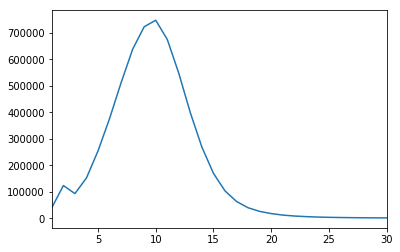

In [14]:
# distribution of word length
df.wordLength.value_counts().sort_index().head(30).plot()

In [10]:
de = df[['de' in x for x in df.languages]]

In [30]:
# long German words
de[~(de.entry.str.contains('\s', regex=True))].sort_values('wordLength', ascending=False).head(10)

entry languages redirect  \
5038626  Rindfleischetikettierungsueberwachungsaufgaben...      [de]      NaN   
3637973     Fußballweltmeisterschaftsqualifikationsspielen      [de]      NaN   
3207285      Fußballweltmeisterschaftsqualifikationsspiels      [de]      NaN   
147335       Fussballweltmeisterschaftsqualifikationsspiel      [de]      NaN   
1556413      Fußballweltmeisterschaftsqualifikationsspiele      [de]      NaN   
5713684       Donaudampfschifffahrtsgesellschaftskapitänes      [de]      NaN   
147341        Fußballweltmeisterschaftsqualifikationsspiel      [de]      NaN   
5713682       Donaudampfschifffahrtsgesellschaftskapitänen      [de]      NaN   
5713686        Donaudampfschifffahrtsgesellschaftskapitäne      [de]      NaN   
5713685        Donaudampfschifffahrtsgesellschaftskapitäns      [de]      NaN   

         wordLength  numLanguages  
5038626          65             1  
3637973          46             1  
3207285          45             1  
147335           45             1  
1556413          45             1  
5713684          44             1  
147341           44             1  
5713682          44             1  
5713686          43             1  
5713685          43             1

In [4]:
# anagrams
df[(df.wordLength > 5) & (df.entry.apply(lambda x: x[::-1]) == df.entry)] \
    .sort_values('wordLength', ascending=False).head(50)

entry                 languages redirect  wordLength  \
168044   saippuakivikauppias                      [fi]      NaN          19   
345636       saippuakauppias                      [fi]      NaN          15   
861717        säpinättänipäs                      [fi]      NaN          14   
762581        säpinällänipäs                      [fi]      NaN          14   
762580        säpinässänipäs                      [fi]      NaN          14   
5010605         parterretrap                      [nl]      NaN          12   
2983896         säpinäänipäs                      [fi]      NaN          12   
861718          apinattanipa                      [fi]      NaN          12   
762577          apinallanipa                      [fi]      NaN          12   
762576          apinassanipa                      [fi]      NaN          12   
5132894         tattarrattat                      [en]      NaN          12   
3116835          kinnikinnik                      [en]      NaN          11   
308093           2-8-0+0-8-2                      [en]      NaN          11   
345479           detartrated                      [en]      NaN          11   
307691           4-6-2+2-6-4                      [en]      NaN          11   
1000923          aibohphobia                      [en]      NaN          11   
307283           2-6-0+0-6-2                      [en]      NaN          11   
4857950          meetsysteem                      [nl]      NaN          11   
308768           4-8-4+4-8-4                      [en]      NaN          11   
762585           säpisisipäs                      [fi]      NaN          11   
5083788          тут как тут                      [ru]      NaN          11   
307006           0-4-0+0-4-0                      [en]      NaN          11   
2981269          kuyuk-kuyuk                      [ms]      NaN          11   
2971482          kanak-kanak                      [ms]      NaN          11   
762579           säpinänipäs                      [fi]      NaN          11   
4560869          kuluk-kuluk                     [abz]      NaN          11   
762575           apinananipa                      [fi]      NaN          11   
3431998          ailihphilia                      [en]      NaN          11   
434303            tavuttuvat                      [fi]      NaN          10   
434464            tavattavat                      [fi]      NaN          10   
3292168           kinikkinik                      [en]      NaN          10   
2677951           simillimis                      [la]      NaN          10   
762573            apinaanipa                      [fi]      NaN          10   
5010736           moorddroom                      [nl]      NaN          10   
3501754           recollocer                      [la]      NaN          10   
285252             sometemos                      [es]      NaN           9   
103542             malayalam  [fr, nb, nn, es, sv, wa]      NaN           9   
306638             2-8-8-8-2                      [en]      NaN           9   
4405812            водоводов                      [ru]      NaN           9   
2326050            sicilicis                      [la]      NaN           9   
763156             nikamakin                      [fi]      NaN           9   
545956             okaisiako                      [fi]      NaN           9   
762584             säpisipäs                      [fi]      NaN           9   
1717978            cinegenic                      [en]      NaN           9   
4857954            droomoord                      [nl]      NaN           9   
5842204            aññamañña                      [pi]      NaN           9   
105636             reconocer                 [ast, es]      NaN           9   
4134438            тет-а-тет                      [ru]      NaN           9   
581731             allakalla                      [fi]      NaN           9   
4465710            манекенам                      [ru]      NaN          